In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
def get_req_dict(name, i, j, k=1):
    req_dict_ls = []
    for index in range(i, j+1, k):
        path = name + (str(index) + ".txt")
        req_dict = {
            'IMG_REGISTER': [],
            'IMG_ROT90CLKW': [],
            'IMG_BLUR': [],
            'IMG_SHARPEN': [],
            'IMG_VERTEDGES': [],
            'IMG_HORIZEDGES': [],
            'IMG_RETRIEVE': []
        }
        with open(path, 'r') as file:
            for line in file:     
                if line[0] == 'T':
                    ls = line.strip().split(' ')[1].split(':')[1].split(',')
                    ls_clean = [ls[0], ls[-3], ls[-2], ls[-1]]
                    if ls[1] == 'IMG_REGISTER':
                        req_dict['IMG_REGISTER'].append(ls_clean)
                    if ls[1] == 'IMG_ROT90CLKW':
                        req_dict['IMG_ROT90CLKW'].append(ls_clean)
                    if ls[1] == 'IMG_BLUR':
                        req_dict['IMG_BLUR'].append(ls_clean)
                    if ls[1] == 'IMG_SHARPEN':
                        req_dict['IMG_SHARPEN'].append(ls_clean)
                    if ls[1] == 'IMG_VERTEDGES':
                        req_dict['IMG_VERTEDGES'].append(ls_clean)
                    if ls[1] == 'IMG_HORIZEDGES':
                        req_dict['IMG_HORIZEDGES'].append(ls_clean)
                    if ls[1] == 'IMG_REGISTER':
                        req_dict['IMG_REGISTER'].append(ls_clean)
        req_dict_ls.append(req_dict)
    return req_dict_ls

def compute_avg_len(req_ls):
    # res = []
    # for i in range(len(req_ls)):
    request_ls = req_ls
    sum_resp = 0
    num_resp = len(request_ls)
    avg_resp = 0
    for j in range(len(request_ls)):
        sum_resp += (float)(request_ls[j][3]) - (float)(request_ls[j][2])
    avg_resp = sum_resp / num_resp
    # res.append(avg_resp)
    return avg_resp

def compute_avg_resp(req_ls):
    # res = []
    # for i in range(len(req_ls)):
    request_ls = req_ls
    sum_resp = 0
    num_resp = len(request_ls)
    avg_resp = 0
    for j in range(len(request_ls)):
        sum_resp += (float)(request_ls[j][3]) - (float)(request_ls[j][0])
    avg_resp = sum_resp / num_resp
    # res.append(avg_resp)
    return avg_resp

def draw_cdf(name_ls, data_ls, avg_resp_ls, a, b, percentile_99_ls):
    # plotting PDF and CDF 
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3) :
        title = f"CDF of Req Length of {name_ls[i]}"
        percentile_99_rep_fifo = np.percentile(data_ls[i], 99)
        percentile_99_ls.append(percentile_99_rep_fifo)
        count, bins_count = np.histogram(data_ls[i], bins=len(data_ls[i])) 
        pdf = count / sum(count)
        cdf = np.cumsum(pdf) 
        axs[i].axvline(x=avg_resp_ls[i], color='r', linestyle='--', label='Avg Req Length')
        axs[i].axvline(x=percentile_99_rep_fifo, color='g', linestyle='--', label='99th Percentile Req Length')
        axs[i].plot(bins_count[1:], cdf, label=f"{name_ls[i]} CDF", color='orange') 
        axs[i].legend() 
        axs[i].set_xlabel('time')
        axs[i].set_ylabel('value')
        axs[i].set_xlim(a, b)
        axs[i].set_title(title)
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
./build/server_img -q 100 2222 > ./eval/data/s_a1.txt & ./build/client -a 10 -I images_small/ -n 1000 2222 > ./eval/data/c_a1.txt
./build/server_img -q 100 2222 > ./eval/data/s_a2.txt & ./build/client -a 10 -I images/ -n 1000 2222 > ./eval/data/c_a2.txt

./build/server_img -q 100 2222 > ./eval/data/s_c0.txt & ./build/client -a 10 -I images/ -n 1000 2222 > ./eval/data/c_c0.txt
./build/server_img -q 100 2222 > ./eval/data/s_c1.txt & ./build/client -a 10 -I images/ -n 1000 2222 > ./eval/data/c_c1.txt
./build/server_img -q 100 2222 > ./eval/data/s_c2.txt & ./build/client -a 10 -I images/ -n 1000 2222 > ./eval/data/c_c2.txt

### a)

(1) In the first round for both `images_small` and `images_all`,  `IMG_SHARPEN`, `MG_VERTEDGES`, `IMG_HORIZEDGES` all have the similar behaviors in their request length CDF, while `IMG_REGISTER`, `IMG_ROT90CLKW`, and `IMG_BLUR` each has its own unique request length CDF, as the response times of all the requests are instant.

(2) As for the predictability, as the table below shown, in both cases, `IMG_VERTEDGES` has the least predictability because the difference between its worst case request length and best case request length is the largest.

(3) 

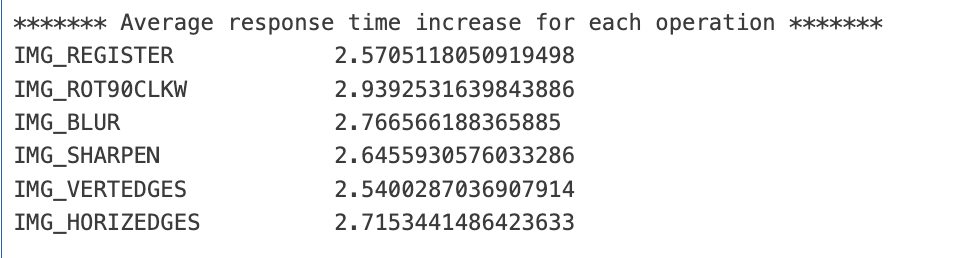

As the table below shown, here is the average response time increase for each operation calculated by avg response time of `images_all` divided by that of `images_small`


(4)


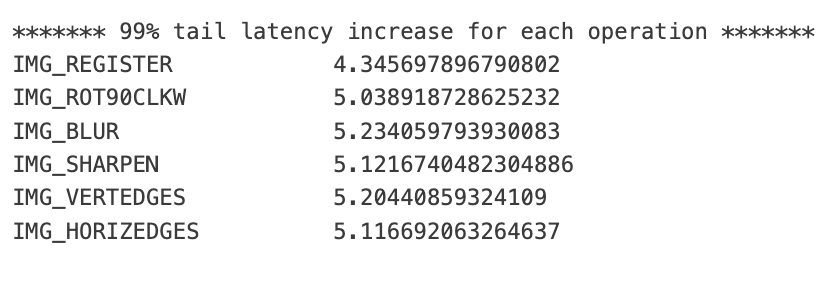

As the table below shown, here is the 99% tail latency increase for each operation calculated by avg response time of `images_all` divided by that of `images_small`

Image		Image operation		Avg Request Length	Predictability		Avg Response Time
------------------------------------------------------------------------------------------------------------------------
images_small	IMG_REGISTER		0.001889262773721736	0.003421000000003005	0.0019511605839396156
images_small	IMG_ROT90CLKW		0.007037999999996386	0.163579000000027	0.026492920289846046
images_small	IMG_BLUR		0.051491985185191005	0.15166399999998248	0.07655209629629857
images_small	IMG_SHARPEN		0.07997397241379546	0.2034529999999677	0.09927673103448278
images_small	IMG_VERTEDGES		0.07869541726618229	0.14907800000003135	0.09866079136690142
images_small	IMG_HORIZEDGES		0.07857318354429904	0.1828570000000127	0.09781381012658706
------------------------------------------------------------------------------------------------------------------------
images_all	IMG_REGISTER		0.004856372262772484	0.009975999999994656	0.004919649635030261
images_all	IMG_ROT90CLKW		0.020686463768111504	5.469326999999964	3.04

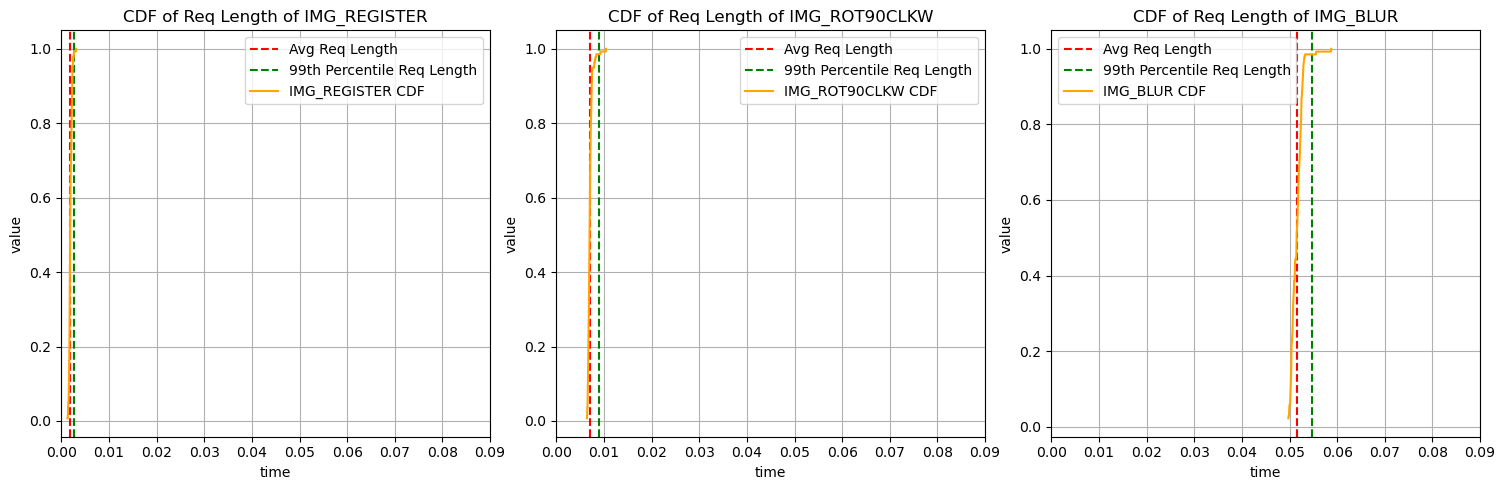

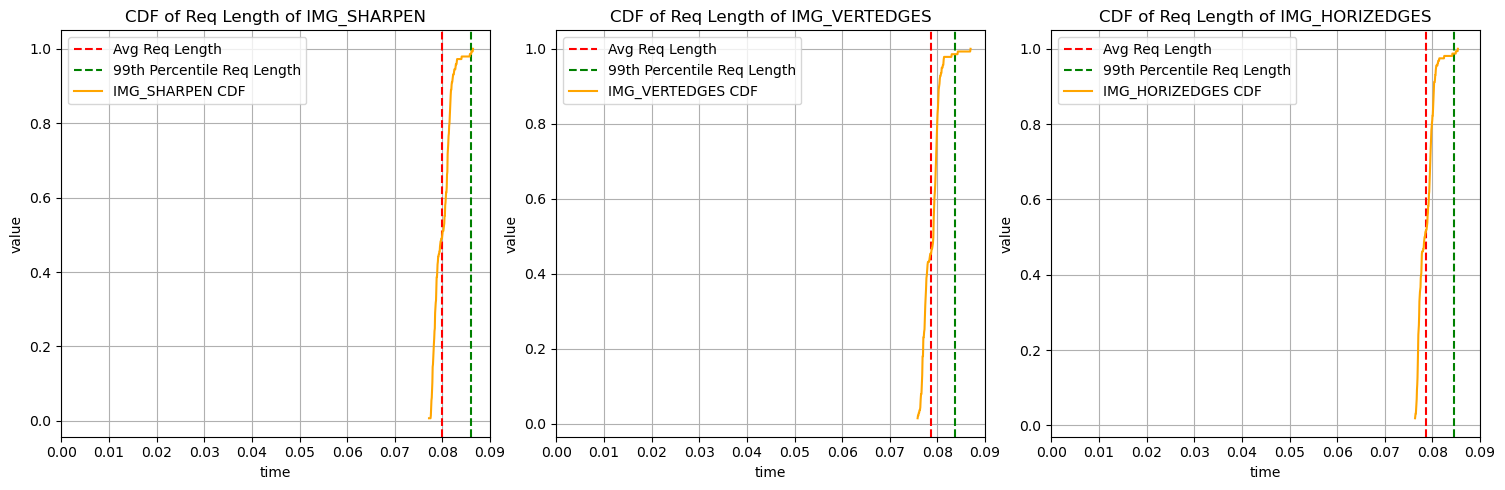


**************************************************	images_all	**************************************************



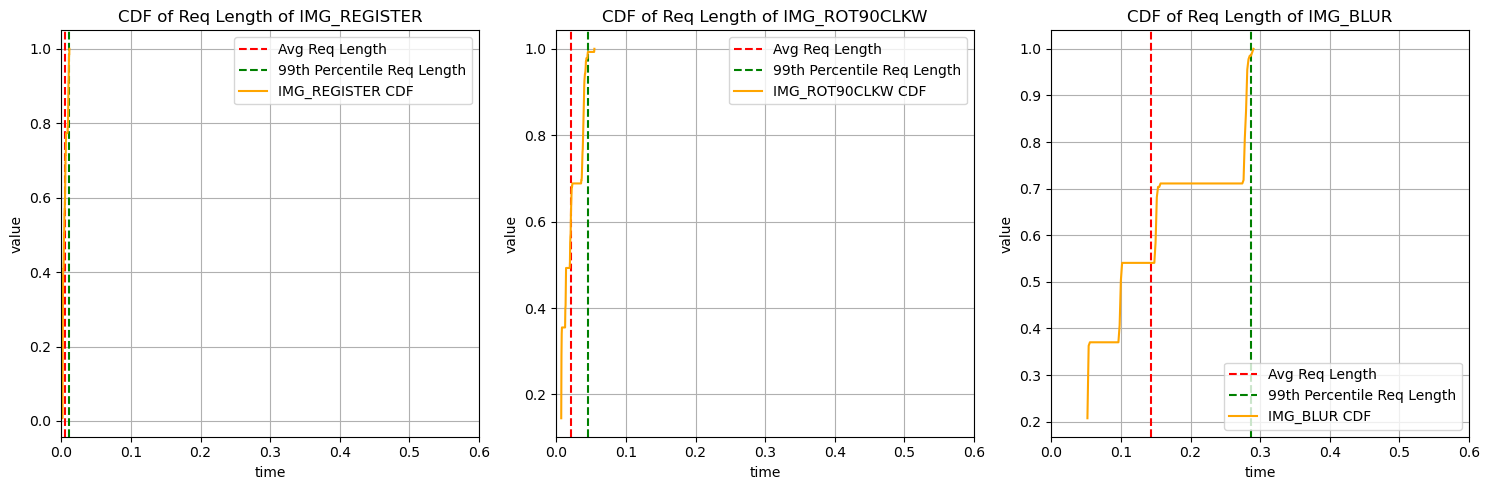

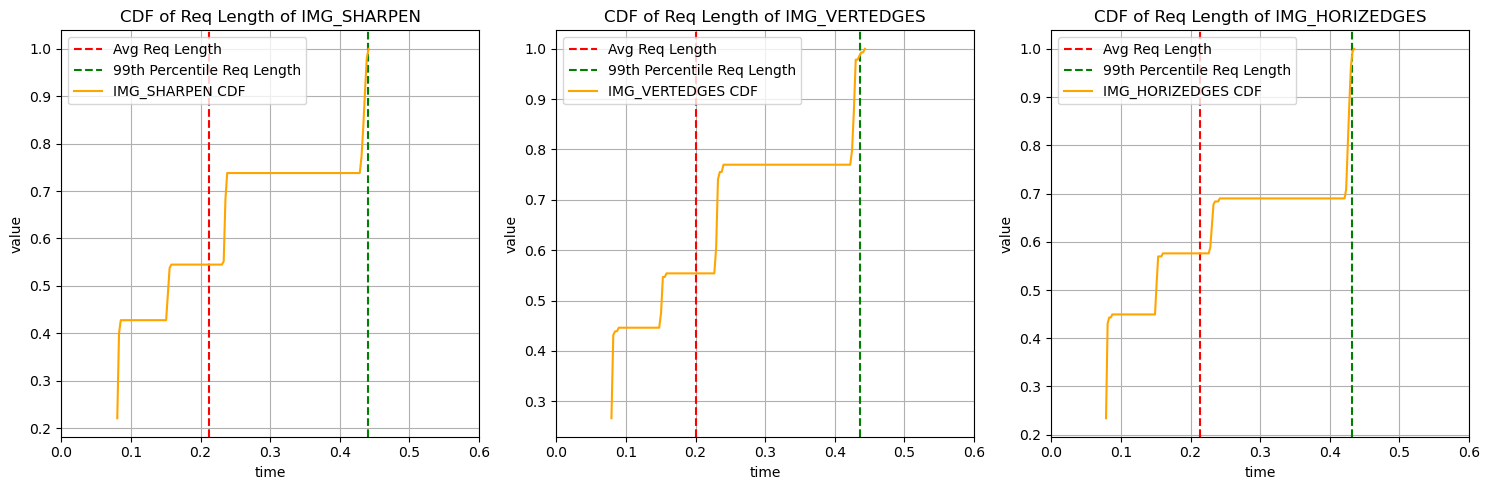


******* 99% tail latency increase for each operation *******
IMG_REGISTER		4.345697896790802
IMG_ROT90CLKW		5.038918728625232
IMG_BLUR		5.234059793930083
IMG_SHARPEN		5.1216740482304886
IMG_VERTEDGES		5.20440859324109
IMG_HORIZEDGES		5.116692063264637


In [3]:
path_a = './data/s_a'
[req_dict_ls_a1, req_dict_ls_a2] = get_req_dict(path_a, 1, 2)
img_op_ls = list(req_dict_ls_a1.keys())
correct_img_op_ls = img_op_ls[0:-1]
req_a1 = [] # request raw data of RUN1
req_a2 = [] # request raw data of RUN2

avg_len_a1 = [] # avg request length list of RUN1
avg_len_a2 = [] # avg request length list of RUN2

req_t_a1 = [] # request length list of RUN1
req_t_a2 = [] # request length list of RUN2

req_len_a1 = []
req_len_a2 = []

avg_rep_a1 = [] # avg response time list of RUN1
avg_rep_a2 = [] # avg response time list of RUN2

percentile_99_a1 = []
percentile_99_a2 = []


for img_op in img_op_ls[0:3]:
    req_t_ls = []
    req_len = []
    ls = req_dict_ls_a1[img_op]
    length = len(ls)
    data = np.zeros(length)
    for i in range(length):
        len_t = (float)(ls[i][3]) - (float)(ls[i][2])
        req_t = (float)(ls[i][3]) - (float)(ls[i][0])
        req_t_ls.append(req_t)
        req_len.append(len_t)
        data[i] = len_t
    req_a1.append(data)
    avg_len = compute_avg_len(ls)
    avg_len_a1.append(avg_len)
    req_t_a1.append(req_t_ls)
    avg_rep_a1.append(compute_avg_resp(ls))
    req_len_a1.append(req_len)

for img_op in img_op_ls[3:-1]:
    req_t_ls = []
    req_len = []
    ls = req_dict_ls_a1[img_op]
    length = len(ls)
    data = np.zeros(length)
    for i in range(length):
        len_t = (float)(ls[i][3]) - (float)(ls[i][2])
        req_t = (float)(ls[i][3]) - (float)(ls[i][0])
        req_t_ls.append(req_t)
        req_len.append(len_t)
        data[i] = len_t
    req_a1.append(data)
    avg_len = compute_avg_len(ls)
    avg_len_a1.append(avg_len)
    req_t_a1.append(req_t_ls)
    avg_rep_a1.append(compute_avg_resp(ls))
    req_len_a1.append(req_len)

for img_op in img_op_ls[0:3]:
    req_t_ls = []
    req_len = []
    ls = req_dict_ls_a2[img_op]
    length = len(ls)
    data = np.zeros(length)
    for i in range(length):
        len_t = (float)(ls[i][3]) - (float)(ls[i][2])
        req_t = (float)(ls[i][3]) - (float)(ls[i][0])
        req_t_ls.append(req_t)
        req_len.append(len_t)
        data[i] = len_t
    req_a2.append(data)
    avg_len = compute_avg_len(ls)
    avg_len_a2.append(avg_len)
    req_t_a2.append(req_t_ls)
    avg_rep_a2.append(compute_avg_resp(ls))
    req_len_a2.append(req_len)

for img_op in img_op_ls[3:-1]:
    req_t_ls = []
    req_len = []
    ls = req_dict_ls_a2[img_op]
    length = len(ls)
    data = np.zeros(length)
    for i in range(length):
        len_t = (float)(ls[i][3]) - (float)(ls[i][2])
        req_t = (float)(ls[i][3]) - (float)(ls[i][0])
        req_t_ls.append(req_t)
        req_len.append(len_t)
        data[i] = len_t
    req_a2.append(data)
    avg_len = compute_avg_len(ls)
    avg_len_a2.append(avg_len)
    req_t_a2.append(req_t_ls)
    avg_rep_a2.append(compute_avg_resp(ls))
    req_len_a2.append(req_len)



print(f"Image\t\tImage operation\t\tAvg Request Length\tPredictability\t\tAvg Response Time")
print("-"*120)
for i in range(6):
    predit = max(req_t_a1[i]) - min(req_t_a1[i])
    print(f"images_small\t{correct_img_op_ls[i]}\t\t{avg_len_a1[i]}\t{predit}\t{avg_rep_a1[i]}")
print("-"*120)
for i in range(6):
    predit = max(req_t_a2[i]) - min(req_t_a2[i])
    print(f"images_all\t{correct_img_op_ls[i]}\t\t{avg_len_a2[i]}\t{predit}\t{avg_rep_a2[i]}")

print()
print('*'*7+ " Average response time increase for each operation "+'*'*7)
for i in range(6):
    print(f"{correct_img_op_ls[i]}\t\t{avg_len_a2[i]/avg_len_a1[i]}")

print()
print("*"*50+"\timages_small\t"+"*"*50)
print()
draw_cdf(correct_img_op_ls[0:3], req_a1[0:3], avg_len_a1[0:3], 0, 0.09, percentile_99_a1)
draw_cdf(correct_img_op_ls[3:], req_a1[3:], avg_len_a1[3:], 0, 0.09, percentile_99_a1)

print()
print("*"*50+"\timages_all\t"+"*"*50)
print()
draw_cdf(correct_img_op_ls[0:3], req_a2[0:3], avg_len_a2[0:3], 0, 0.6, percentile_99_a2)
draw_cdf(correct_img_op_ls[3:], req_a2[3:], avg_len_a2[3:], 0, 0.6, percentile_99_a2)

print()
print('*'*7+ " 99% tail latency increase for each operation "+'*'*7)
for i in range(6):
    print(f"{correct_img_op_ls[i]}\t\t{percentile_99_a2[i]/percentile_99_a1[i]}")


### b)

As the tables and the graphs below shown, `IMG_REGISTER` and `IMG_ROT90CLKW` have good prediction with ewma since their prediction errors are relatviely small. compared to errors of the other four.


Image		Img_op		Avg error
------------------------------------------------------------
images_all	IMG_REGISTER	0.0006542344441661929
images_all	IMG_ROT90CLKW	0.00400307308751556
images_all	IMG_BLUR	0.02785583880047417
images_all	IMG_SHARPEN	0.04451490917620077
images_all	IMG_VERTEDGES	0.04084526308927787
images_all	IMG_HORIZEDGES	0.04414385885565215


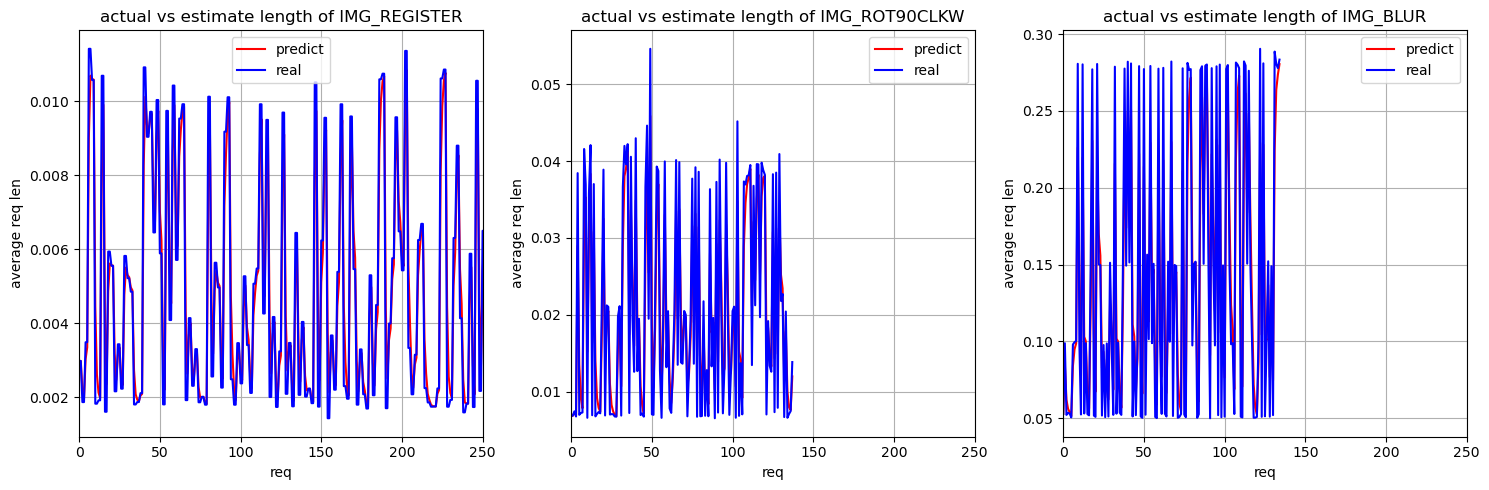

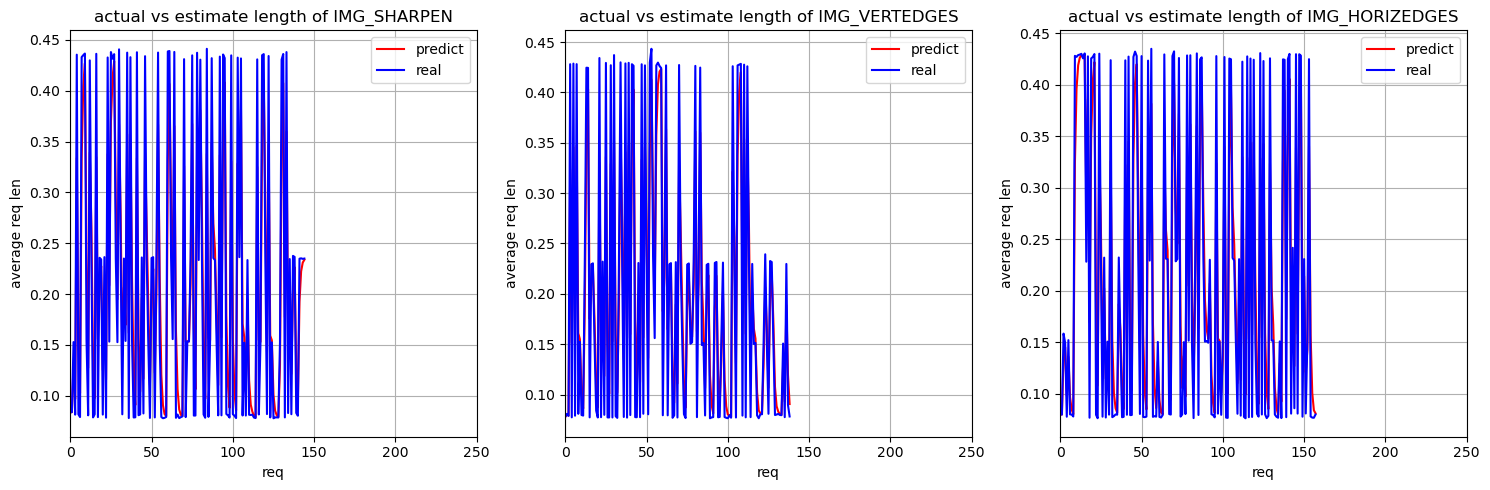

In [9]:
# construct EWMA
def EWMA(request_len_ls, alpha):
    estimate_ls = []
    for i in range(len(request_len_ls)):
        val = request_len_ls[i]
        if(i == 0):
            estimate_ls.append(val)
        else:
            estimate = alpha * val + (1-alpha) * estimate_ls[-1]
            estimate_ls.append(estimate)
    return estimate_ls


def EWMA_ls(req_len_ls, alpha):
    res = []
    for i in range(len(req_len_ls)):
        res.append(EWMA(req_len_ls[i], alpha))
    return res

EWMA_ls_a1 = EWMA_ls(req_len_a1, 0.7)
EWMA_ls_a2 = EWMA_ls(req_len_a2, 0.7)

# compute misprediction error as the absolute value of the difference between your prediction and the observed nth job length
def compute_error(EWMA_ls, req_len_ls):
    res = []
    for i in range(len(EWMA_ls)):
        ls = EWMA_ls[i]
        length = len(ls)
        error_sum = 0
        for j in range(len(ls)):
            error_sum += abs(ls[j]-req_len_ls[i][j])
        error_avg = error_sum / length
        res.append(error_avg)
    return res

def draw_ewma(name_ls, EWMA_ls, req_len):
    # plotting PDF and CDF 
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3) :
        x = [i for i in range(len(req_len[i]))]
        axs[i].plot(x, EWMA_ls[i], color='red',  label='predict')
        axs[i].plot(x, req_len[i], color='blue',  label='real')
        axs[i].set_xlabel('req')
        axs[i].set_ylabel('average req len')
        axs[i].grid(True)
        axs[i].legend()
        axs[i].set_xlim(0, 250)
        # axs[i].set_ylim(0, 0.5)
        axs[i].set_title(f"actual vs estimate length of {name_ls[i]}")
    plt.tight_layout()
    plt.show()

# error_a1 = compute_error(EWMA_ls_a1, req_len_a1)
error_a2 = compute_error(EWMA_ls_a2, req_len_a2)
print(f"Image\t\tImg_op\t\tAvg error")
print('-'*60)

for i in range(len(error_a2)):
    print(f"images_all\t{correct_img_op_ls[i]}\t{error_a2[i]}")

draw_ewma(correct_img_op_ls[0:3], EWMA_ls_a2[0:3], req_len_a2[0:3])
draw_ewma(correct_img_op_ls[3:], EWMA_ls_a2[3:], req_len_a2[3:])

### c)

`-O<value>` flag represents the optimization level that the compiler to perform on the code being compiled. The optimization is off when `<value>=0`; the optimization comes to its first level when `<value>=1`; the optimization is futrher when `<value>=2`. 

However, as can be seen from the table and the graph below, the average response time decreases as `<value>` decreases, which is consistent with what it should be.




Makefile setting	Average Request Length
---------------------------------------------
-O0			0.11533166000000052
-O1			0.11469311599999878
-O2			0.11379777300000068


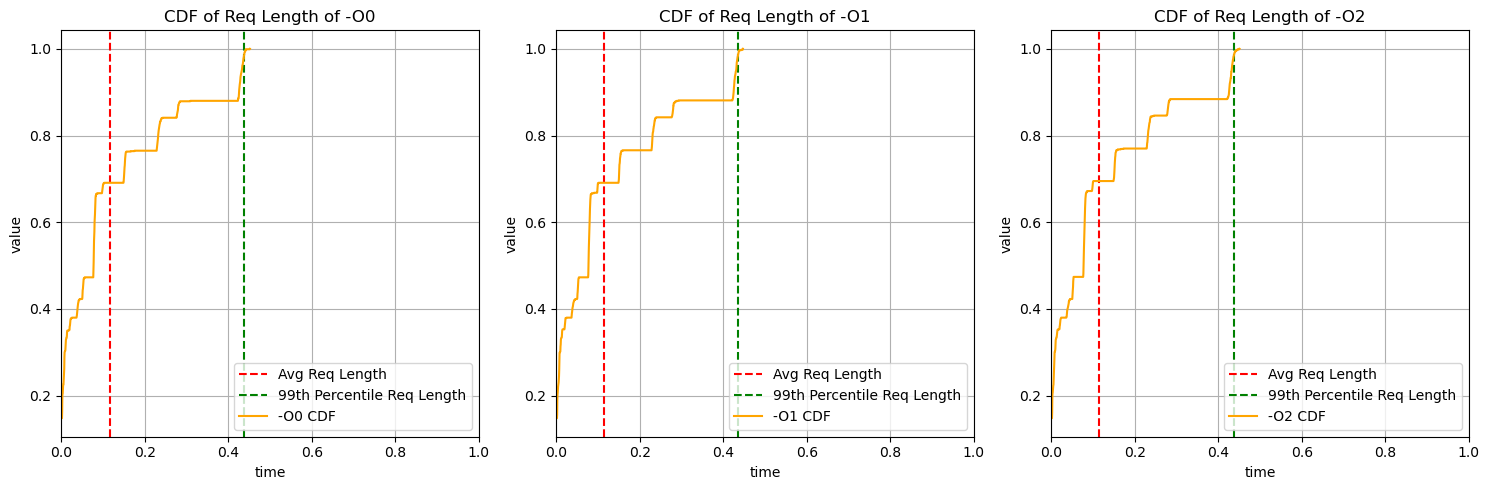

In [20]:
def get_req_ls_c(name, i, j, k=1):
    req_ls = []
    for index in range(i, j+1, k):
        path = name + (str(index) + ".txt")
        request_ls = []
        with open(path, 'r') as file:
            for line in file:     
                if line[0] == 'T':
                    ls = line.strip().split(' ')[1].split(':')[1].split(',')
                    # if line[2] != 'IMG_RETRIEVE':
                    ls_clean = [ls[0], ls[-3], ls[-2], ls[-1]]
                    request_ls.append(ls_clean) 
        req_ls.append(request_ls)
    return req_ls

def compute_avg_len_c(req_ls):
    res = []
    for i in range(len(req_ls)):
        request_ls = req_ls[i]
        sum_resp = 0
        num_resp = len(request_ls)
        avg_resp = 0
        print()
        for j in range(len(request_ls)):
            sum_resp += (float)(request_ls[j][3]) - (float)(request_ls[j][2])
        avg_resp = sum_resp / num_resp
        res.append(avg_resp)
    return res


path_c = './data/s_c'
req_ls_c = get_req_ls_c(path_c, 0, 2)
req_c = []
req_len_ls = []
for i in range(3):
    request_len_ls = []
    ls = req_ls_c[i]
    length = len(ls)
    data = np.zeros(length)
    for i in range(length):
        val = (float)(ls[i][3]) - (float)(ls[i][2])
        request_len_ls.append(val)
        req_t = val
        data[i] = req_t
    req_c.append(data)
    req_len_ls.append(request_len_ls)
# print(req_c)
avg_len_c = compute_avg_len_c(req_ls_c)
# print(avg_rep_c)
name_ls_c = ["-O0", "-O1", "-O2"]
print("Makefile setting\tAverage Request Length")
print("-"*45)
for i in range(3):
    len_ls = req_len_ls[i]
    # print(len_ls)
    print(f"{name_ls_c[i]}\t\t\t{avg_len_c[i]}")
draw_cdf(name_ls_c, req_c, avg_len_c, 0, 1, [])